In [556]:
# importing dependencies
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn import tree
from sklearn.metrics import mean_squared_error


In [557]:
houseData5 = pd.read_csv(r'C:\Users\VAIO\Documents\houseData5.csv')
pd.set_option('max_columns', None)
pd.set_option("max_rows", None)

In [563]:
#prepare the data
X = houseData5.loc[:, ~houseData5.columns.isin(['sale_price_$',
                                                'listing_price_to_nearest_1000'
                                               ]
                                              )
                  ]
y = houseData5['sale_price_$']

In [579]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# reset the indices
X_train,y_train,X_test,y_test = X_train.reset_index(drop=True),y_train.reset_index(drop=True),X_test.reset_index(drop=True),y_test.reset_index(drop=True)


In [ ]:
#https://towardsdatascience.com/understanding-train-test-split-scikit-learn-python-ea676d5e3d1
from sklearn.tree import DecisionTreeRegressor

# Lets use a regression tree because our sale_price us continuous. 
#We want to find the ideal depth of our tree so let's graph depth vs oos score

max_depth_range = list(range(3, 25))
# List to store the average R^2 and RMSE for each value of max_depth:
r2_list = []
RMSE_list = []
for depth in max_depth_range:
    reg = DecisionTreeRegressor(criterion = ('squared_error'),
                                max_depth = depth,
                                random_state = 0
                               )
    reg.fit(X_train, y_train)
    
    R2k = (reg.score(X_test, y_test))*100000
    RMSE = round(mean_squared_error(y_true=y_test, y_pred = reg.predict(X_test), squared=False), 6)
    r2_list.append(R2k)
    RMSE_list.append(RMSE)

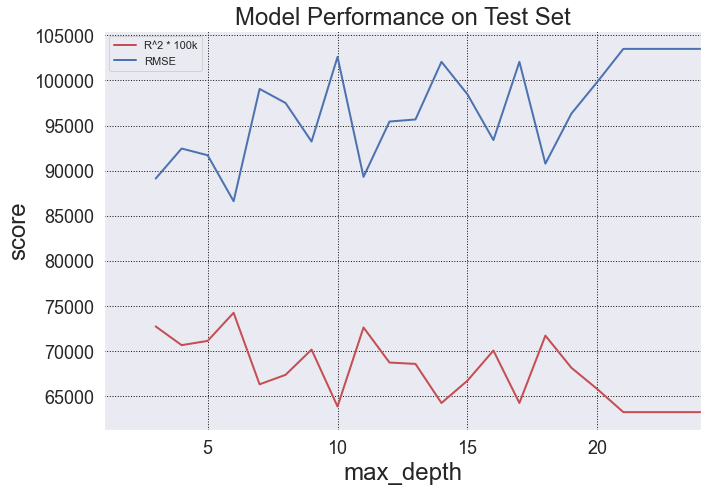

In [296]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r',
       label = "R^2 * 100k")
ax.plot(max_depth_range,
       RMSE_list,
       lw=2,
       color='b',
       label = "RMSE")
ax.legend()
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('score', fontsize = 24)
ax.set_title('Model Performance on Test Set', fontsize = 24)
fig.tight_layout()

In [297]:
#It looks like maybe 6 deep is ideal
reg = DecisionTreeRegressor(criterion = ('squared_error'), max_depth = 6, random_state = 0)
reg.fit(X_train, y_train)
# Let's get those scores

# In sample predictions
yhat_in_sample = reg.predict(X_train)

# oos predictions
yhat_oos = reg.predict(X_test)

# IN SAMPLE
print(f"In sample R^2: {round(reg.score(X_train, y_train), 6)}")
print(f"In sample RMSE {round(mean_squared_error(y_true=y_train, y_pred=yhat_in_sample, squared=False), 6)}")

# OOS
print(f"OOS R^2: {round(reg.score(X_test, y_test), 6)}")
print(f"OOS RMSE {round(mean_squared_error(y_true=y_test, y_pred=yhat_oos, squared=False), 6)}")



In sample R^2: 0.929561
In sample RMSE 48295.713543
OOS R^2: 0.742588
OOS RMSE 86622.109789


In [485]:
text_representation = tree.export_text(reg, feature_names= ['num_half_bathrooms',
                                                            'walk_score',
                                                            'sq_footage',
                                                            'pct_tax_deductibl',
                                                            'num_total_rooms',
                                                            'num_full_bathrooms',
                                                            'num_floors_in_building',
                                                            'num_bedrooms',
                                                            'kitchen_type',
                                                            'garage_exists',
                                                            'full_address_or_zip_code',
                                                            'fuel_type','dogs_allowed',
                                                            'dining_room_type',
                                                            'date_of_sale',
                                                            'coop_condo',
                                                            'community_district_num',
                                                            'cats_allowed',
                                                            'approx_year_built',
                                                            'Missing_taxes',
                                                            'Missing_maintenance_cost',
                                                            'Missing_common_charges',
                                                            'Missing_parking_charges',
                                                            'additional_costs_$',
                                                            'zip_code'
                                                           ]
                                      )
print(text_representation)


|--- num_full_bathrooms <= 0.50
|   |--- coop_condo <= 0.50
|   |   |--- sq_footage <= 850.13
|   |   |   |--- zip_code <= 11399.00
|   |   |   |   |--- sq_footage <= 774.07
|   |   |   |   |   |--- additional_costs_$ <= 756.50
|   |   |   |   |   |   |--- value: [181951.14]
|   |   |   |   |   |--- additional_costs_$ >  756.50
|   |   |   |   |   |   |--- value: [235586.67]
|   |   |   |   |--- sq_footage >  774.07
|   |   |   |   |   |--- additional_costs_$ <= 1106.50
|   |   |   |   |   |   |--- value: [253973.92]
|   |   |   |   |   |--- additional_costs_$ >  1106.50
|   |   |   |   |   |   |--- value: [412500.00]
|   |   |   |--- zip_code >  11399.00
|   |   |   |   |--- num_floors_in_building <= 25.00
|   |   |   |   |   |--- community_district_num <= 17.50
|   |   |   |   |   |   |--- value: [172188.89]
|   |   |   |   |   |--- community_district_num >  17.50
|   |   |   |   |   |   |--- value: [130602.04]
|   |   |   |   |--- num_floors_in_building >  25.00
|   |   |   |   |   

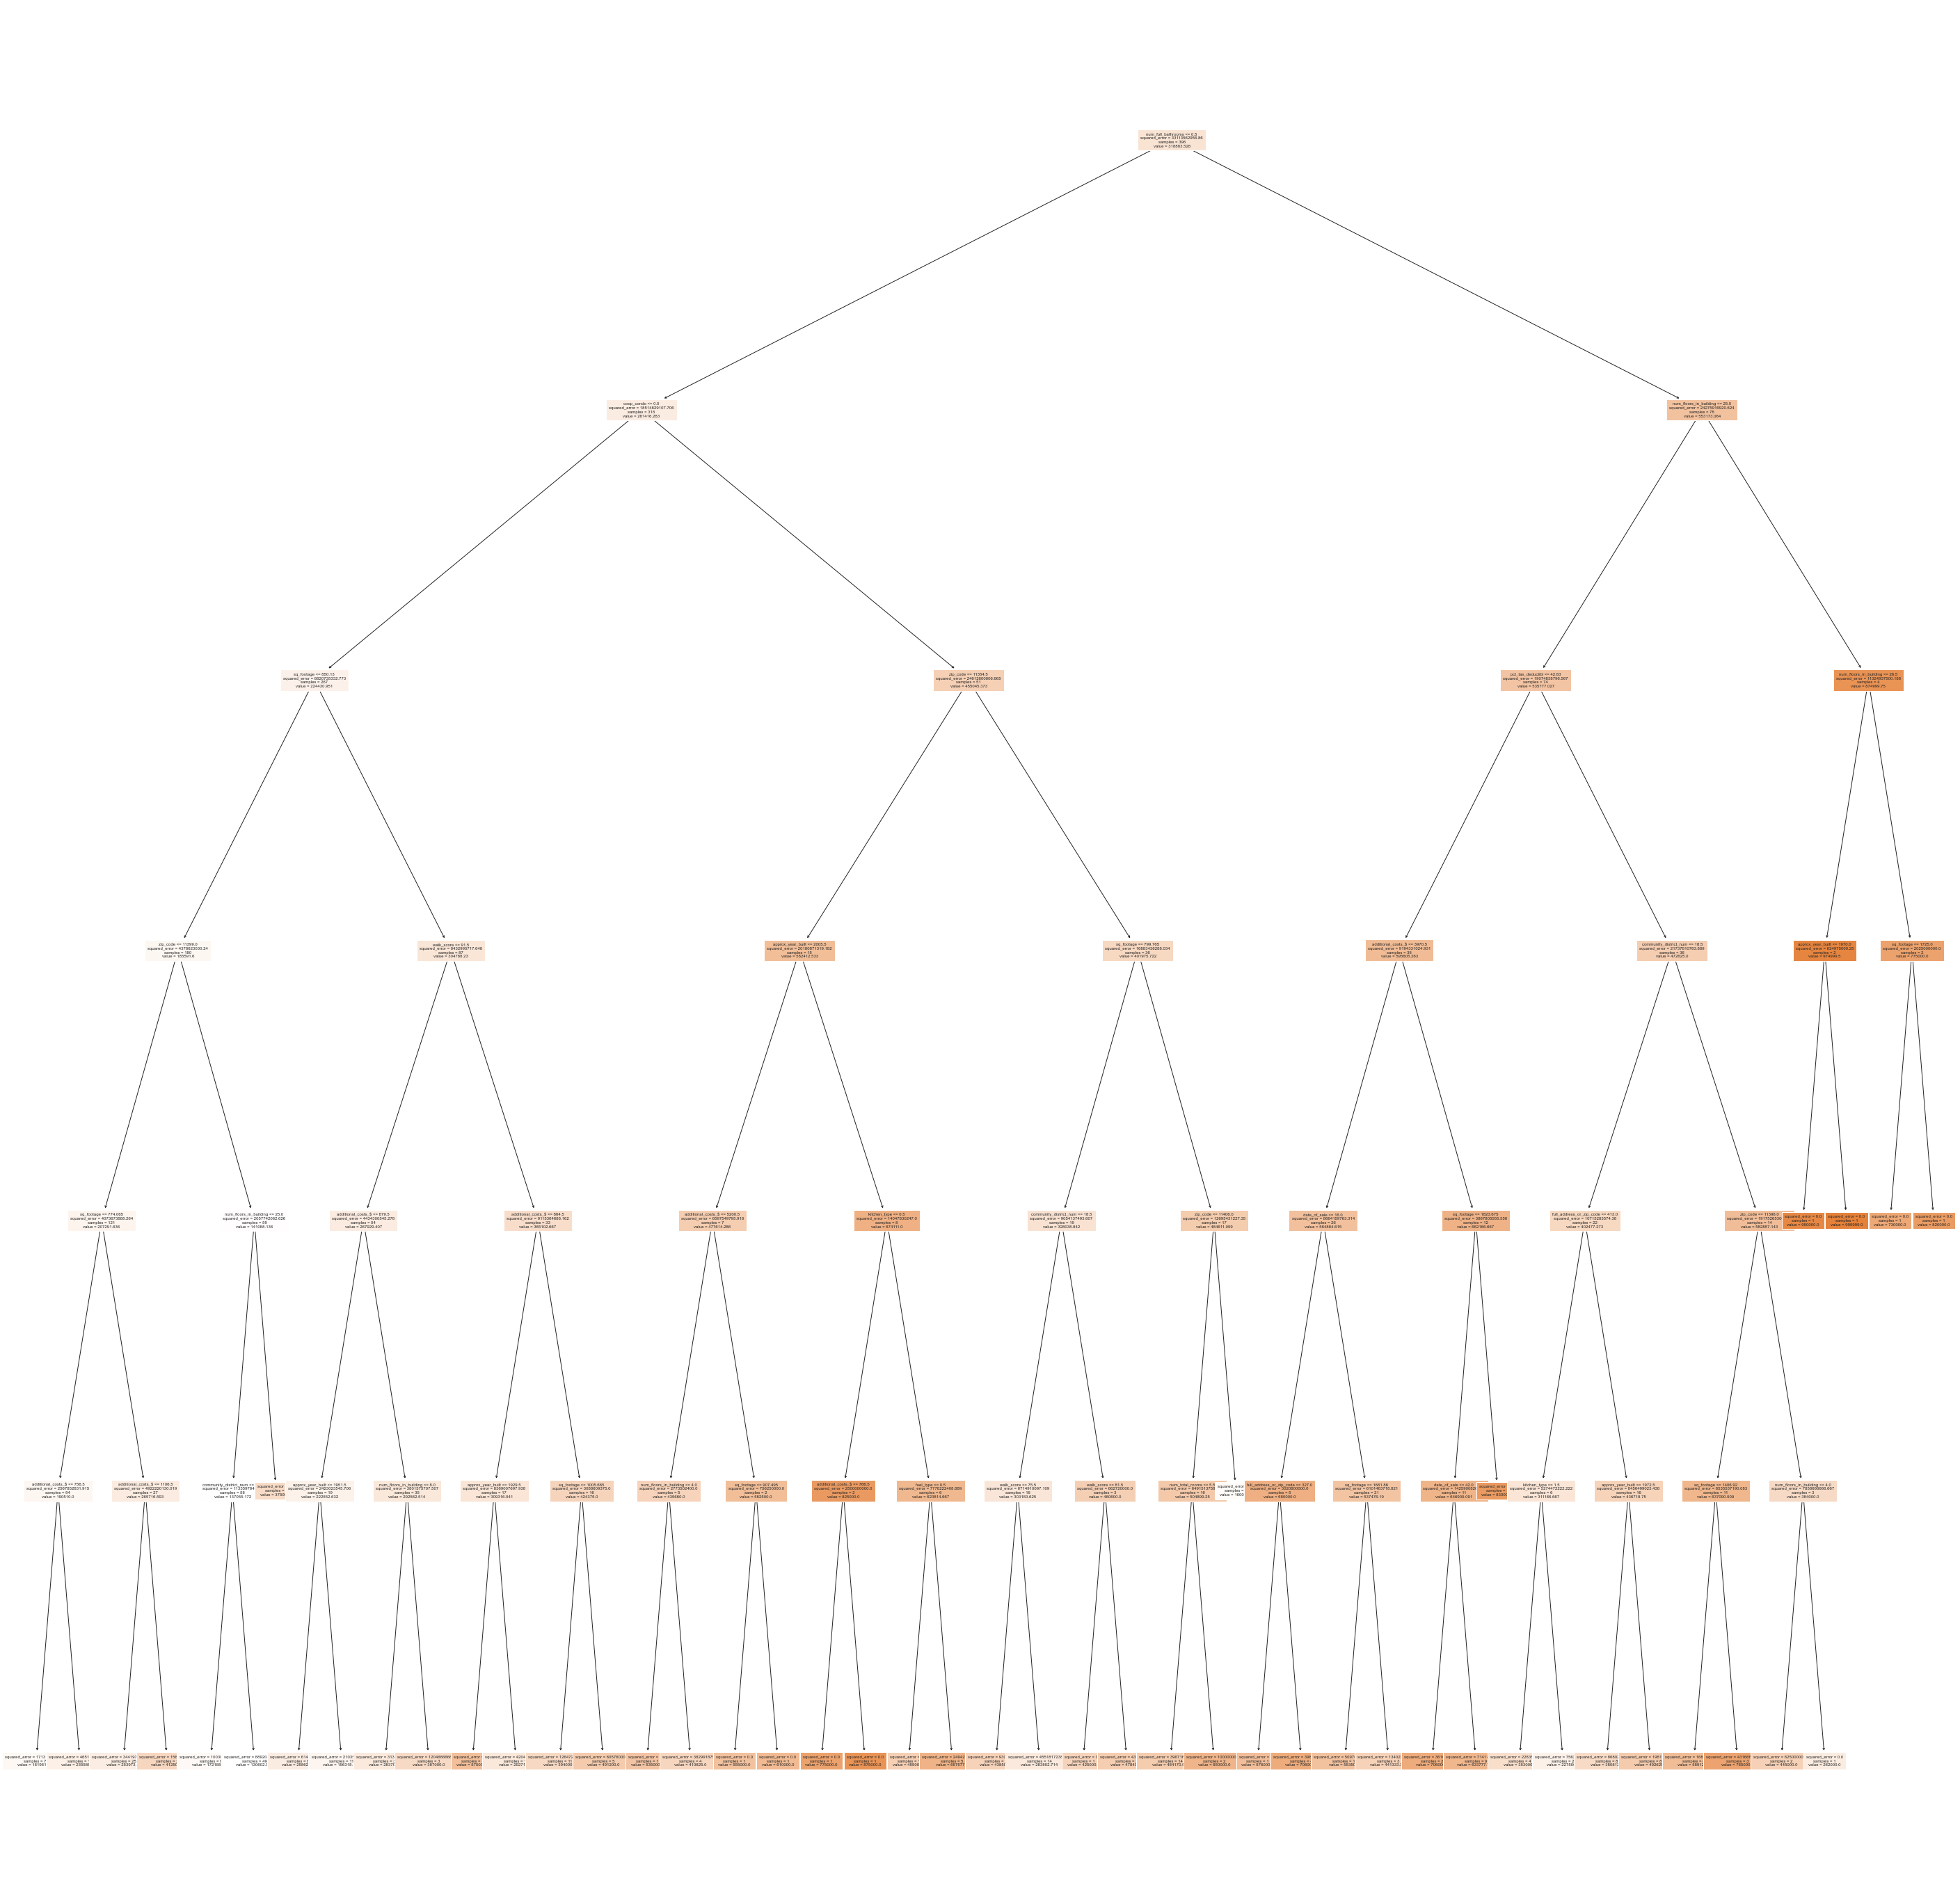

In [489]:
fig = plt.figure(figsize=(50,50))
tree.plot_tree(reg, feature_names = X_train.columns, class_names=y, filled=True, fontsize=6)
plt.show()
fig.savefig(fname = 'decision_tree.png', dpi= 200)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier  
# classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
# classifier.fit(X_train, y_train)  
# #Predicting the test set result  
# y_pred= classifier.predict(X_test) 
# classifier.score()

In [353]:
#lets try some different OLS regression methods
import statsmodels.api as sm

OLSmodel1 = sm.OLS(y_train, X_train).fit()
OLSmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           sale_price_$   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              222.2
Date:                Tue, 24 May 2022   Prob (F-statistic):                   3.71e-206
Time:                        14:01:54   Log-Likelihood:                         -5087.4
No. Observations:                 396   AIC:                                  1.022e+04
Df Residuals:                     371   BIC:                                  1.032e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
num_half_bathrooms        5.002e+04   1.96e+04      2.553      0.011    1.15e+04    8.85e+04
walk_score                 981.4685    405.594      2.420      0.016     183.917    1779.020
sq_footage                  26.8503     16.698      1.608      0.109      -5.984      59.684
pct_tax_deductibl        -3791.0074   1008.688     -3.758      0.000   -5774.469   -1807.545
num_total_rooms          -2161.5332   7778.794     -0.278      0.781   -1.75e+04    1.31e+04
num_full_bathrooms        1.133e+05   1.67e+04      6.791      0.000    8.05e+04    1.46e+05
num_floors_in_building    5993.2612   1040.144      5.762      0.000    3947.944    8038.578
num_bedrooms              6.583e+04   1.15e+04      5.722      0.000    4.32e+04    8.85e+04
kitchen_type             -1.921e+04   7005.627     -2.742      0.006    -3.3e+04   -5434.655
garage_exists             1.488e+04    1.4e+04      1.064      0.288   -1.26e+04    4.24e+04
full_address_or_zip_code   -25.3290     14.708     -1.722      0.086     -54.251       3.593
fuel_type                 2780.5788   5285.483      0.526      0.599   -7612.683    1.32e+04
dogs_allowed              1.367e+04    1.5e+04      0.909      0.364   -1.59e+04    4.33e+04
dining_room_type           1.49e+04   3758.294      3.965      0.000    7511.226    2.23e+04
date_of_sale               -97.8663     76.771     -1.275      0.203    -248.827      53.094
coop_condo                2.256e+05   4.75e+04      4.747      0.000    1.32e+05    3.19e+05
community_district_num    5726.5213   1987.571      2.881      0.004    1818.203    9634.840
cats_allowed              8186.4007   1.39e+04      0.588      0.557   -1.92e+04    3.55e+04
approx_year_built          -33.4209     51.143     -0.653      0.514    -133.988      67.146
Missing_taxes             4.178e+04   4.21e+04      0.992      0.322   -4.11e+04    1.25e+05
Missing_maintenance_cost  8497.6366   2.84e+04      0.299      0.765   -4.74e+04    6.44e+04
Missing_common_charges    3.758e+04   2.88e+04      1.304      0.193   -1.91e+04    9.42e+04
Missing_parking_charges   6778.0234   1.24e+04      0.546      0.585   -1.76e+04    3.12e+04
additional_costs_$          10.6314      5.335      1.993      0.047       0.140      21.123
zip_code                     6.6169      3.435      1.926      0.055      -0.138      13.372
==============================================================================
Omnibus:                       52.812   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.790
Skew:                           0.582   Prob(JB):                     6.05e-37
Kurtosis:                       5.959   Cond. No.               

In [492]:
from sklearn.metrics import mean_squared_error, r2_score

# Let's get those scores

# In sample predictions
yhat_in_sampleOLS1 = OLSmodel1.predict(X_train)

# oos predictions
yhat_oosOLS1 = OLSmodel1.predict(X_test)

# IN SAMPLE
print(f"In sample OLS R^2: {round(r2_score(y_true = y_train, y_pred= yhat_in_sampleOLS1), 6)}")
print(f"In sample OLS RMSE: ${round(mean_squared_error(y_true=y_train, y_pred=yhat_in_sampleOLS1, squared=False), 2)}")

# OOS
print(f"OOS R^2: {round(r2_score(y_true = y_test, y_pred= yhat_oosOLS1), 6)}")
print(f"OOS RMSE: ${round(mean_squared_error(y_true=y_test, y_pred=yhat_oosOLS1, squared=False), 2)}")


print((OLSmodel1.params).sort_values(ascending=False))
#print((OLSmodel1.params).idxmax)

In sample OLS R^2: 0.745128
In sample OLS RMSE: $91867.96
OOS R^2: 0.782819
OOS RMSE: $79565.6
coop_condo                  225599.210952
num_full_bathrooms          113313.881925
num_bedrooms                 65833.595700
num_half_bathrooms           50018.385203
Missing_taxes                41784.095494
Missing_common_charges       37575.668254
dining_room_type             14901.456664
garage_exists                14877.300830
dogs_allowed                 13674.503448
Missing_maintenance_cost      8497.636642
cats_allowed                  8186.400710
Missing_parking_charges       6778.023408
num_floors_in_building        5993.261242
community_district_num        5726.521305
fuel_type                     2780.578849
walk_score                     981.468516
sq_footage                      26.850339
additional_costs_$              10.631353
zip_code                         6.616863
full_address_or_zip_code       -25.329048
approx_year_built              -33.420926
date_of_sale           

In [348]:
# lets try another OLS method
from sklearn import linear_model

lm = linear_model.LinearRegression()
OLSmodel2 = lm.fit(X_train,y_train)


In [349]:
from sklearn.metrics import mean_squared_error, r2_score

# Let's get those scores

# In sample predictions
yhat_in_sampleOLS2 = OLSmodel2.predict(X_train)

# oos predictions
yhat_oosOLS2 = OLSmodel2.predict(X_test)

# IN SAMPLE
print(f"In sample OLS R^2: {round(r2_score(y_true = y_train, y_pred= yhat_in_sampleOLS2), 6)}")
print(f"In sample OLS RMSE: ${round(mean_squared_error(y_true=y_train, y_pred=yhat_in_sampleOLS2, squared=False), 2)}")

# OOS
print(f"OOS R^2: {round(r2_score(y_true = y_test, y_pred= yhat_oosOLS2), 6)}")
print(f"OOS RMSE: ${round(mean_squared_error(y_true=y_test, y_pred=yhat_oosOLS2, squared=False), 2)}")


In sample OLS R^2: 0.745389
In sample OLS RMSE: $91820.87
OOS R^2: 0.7827
OOS RMSE: $79587.27


In [350]:
lm.coef_


array([ 4.86051122e+04,  1.00726564e+03,  2.75787158e+01, -3.78572947e+03,
       -1.70758341e+03,  1.11485130e+05,  5.80580645e+03,  6.52273220e+04,
       -1.94234885e+04,  1.48594628e+04, -2.51976823e+01,  3.02019476e+03,
        1.43245381e+04,  1.50175636e+04, -9.54119867e+01,  2.16749192e+05,
        5.96381868e+03,  8.07901925e+03,  2.25824485e+02,  4.52901474e+04,
        1.01793020e+04,  3.81465194e+04,  7.88065883e+03,  1.21330914e+01,
        6.78311305e+00])

In [351]:
lm.intercept_

-522063.31937626924

In [581]:
# All good but we definitely saw some variance. Lets try random forest 
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

r2_listRF = []
RMSE_listRF = []
position_list = []
max_depth_range = list(range(3, 20))
max_features_range = list(range(5,23))
for depth in max_depth_range:
    for features in max_features_range:
        rf = RandomForestRegressor(criterion='squared_error',
                                   oob_score= True,
                                   n_estimators = 50,
                                   max_features= features,
                                   max_depth= depth,
                                   random_state = 0
                                  )
        rf.fit(X_train, y_train)
        
        r2RF= (rf.score(X_test, y_test))
        RMSERF= round(mean_squared_error(y_true=y_test, y_pred = rf.predict(X_test), squared=False), 2)
        position = str(depth) + ' x ' + str(features)
        r2_listRF.append(r2RF)
        RMSE_listRF.append(RMSERF)
        position_list.append(position)
# print('indices             ',list(range(1,len(max_depth_range))))
# print('max_depth_range:    ', max_depth_range, '\n', 'max_features_range:', max_features_range)
# print('r2: ', max(r2_listRF), r2_listRF.index(max(r2_listRF) ) )
print('max_depth_range x max_features_range')
print('r2: ',
      round(max(r2_listRF),4), 
      position_list[ int(r2_listRF.index(max(r2_listRF)))]
                   
     )
print('RMSE:',
      min(RMSE_listRF),
      position_list[ int(RMSE_listRF.index(min(RMSE_listRF)))]
                                 
     )

max_depth_range x max_features_range
r2:  0.8843 7 x 11
RMSE: 57524.32 7 x 11


In [ ]:
# 500trees
# max_depth_range x max_features_range
# r2:  0.8603 17d x 10f
# RMSE: 63811.64 17d x 10f

# 100t
# max_depth_range x max_features_range
# r2:  0.8613 17d x 14f
# RMSE: 63574.74 17d x 14f

# 50t
# max_depth_range x max_features_range
# r2:  0.8669 17d x 14f
# RMSE: 62296.22 17d x 14f


In [580]:
# so we know that depth of 17 and 14 feature try are ideal. 


rf = RandomForestRegressor(criterion='squared_error',
                           n_estimators = 50,
                           oob_score=True,
                           max_features= 14,
                           max_depth= 17,
                           random_state = 0
                          )
rf.fit(X_train, y_train)

# In sample predictions
yhat_in_sample = rf.predict(X_train)

# oos predictions
yhat_oos = rf.predict(X_test)

# IN SAMPLE
print(f"In sample R^2: {round(rf.score(X_train, y_train), 6)}")
print(f"In sample RMSE {round(mean_squared_error(y_true=y_train, y_pred=yhat_in_sample, squared=False), 6)}")

# OOS
print(f"OOS R^2: {round(rf.score(X_test, y_test), 6)}")
print(f"OOS RMSE {round(mean_squared_error(y_true=y_test, y_pred=yhat_oos, squared=False), 6)}")



In sample R^2: 0.974242
In sample RMSE 29272.587125
OOS R^2: 0.871798
OOS RMSE 60542.335003
